In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [8]:
#Get data from csv file
df = pd.read_csv('/content/drive/My Drive/pydata/911.csv')

In [9]:
#check data
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [10]:
#let'see which top 5 zipcode are making the most call (probably the most dangerous zipcode)
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Finding: The top 5 zipcode are 19401, 19464, 19403, 19446 and 19406. The top 2 are over 6,000, which is 2,000 more then the 3rd and 4th

In [11]:
#let'see which top 5 town are making the most call (probably the most dangerous town)
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Finding: Top 5 town are Lower Merion, Abington, Norristown, Upper Merion, and Cheltenham. Among these town the top one, Lower Merion is almost 2,500 calls more than the second (Ablington)

In [12]:
#To find out the most common reason people call 911
#Reasons are blended in the column 'Title', at the front part of the data, such as "EMS: BACK PAINS/INJURY" on row 1

#create 2 new columns for Reasons and Problems
df['Reason'] = df['title'].apply(lambda x:x.split(':')[0])
df['Problem'] = df['title'].apply(lambda x:x.split(':')[1])

#checking new columns
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Problem
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


In [13]:
#What are those reasons and how common they are
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Finding: There are only 3 reasons:EMS, Traffic, and Fire. Among them EMS is the most common reason people called 911

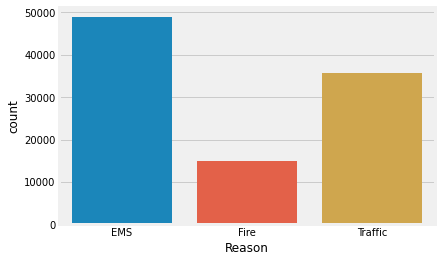

In [14]:
#Let's plot them in bar chart
sns.countplot(x='Reason', data=df)

In [10]:
#Need to plot out how the data changed with time

#First, need to check if the column 'timeStamp' is in time format
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
Reason        object
Problem       object
dtype: object

In [15]:
#timeStamp is an object. need to convert it to DateTime
from datetime import datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
#just to verify if the convert is successful
time = df['timeStamp'].iloc[0]
time.hour

17

In [17]:
#breakdown the timeStamp into Hour, Month and Day of Week for further analysis
df['Hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['Month'] = df['timeStamp'].apply(lambda x:x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x:x.dayofweek)

#check data
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Problem,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,3


In [18]:
#need to convert Day of Week into actual string names of the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

#re-check data
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Problem,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,Thu


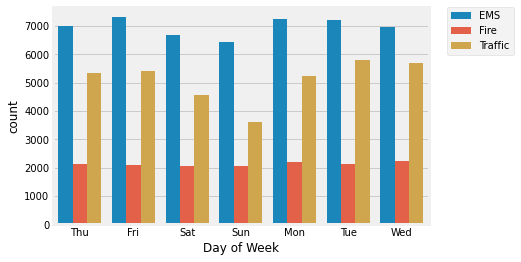

In [19]:
#see which day of the week has the most call for what reasons
sns.countplot(x='Day of Week',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Conclusion:**
1. Overall EMS is the most common reason people call 911. This is still true even if we check across every day of the week
2. Fire is the least reason people call 911, and it's also stable across the week. We do not see any special days of the week is busy for fire
3. Traffic is low on Weekend, probably because we have less commute due to weekend. Middle of the week are the busiest days for Traffic

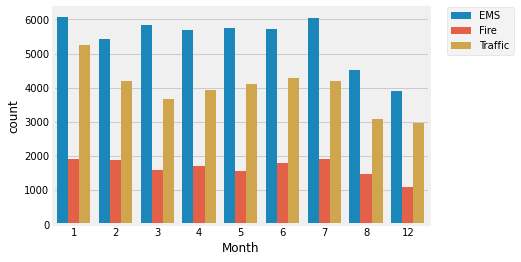

In [20]:
#Let's see the same analysis for Month
sns.countplot(x='Month',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

There are some missing months on the graph... let's try other method to get those data. 

In [21]:
bymonth = df.groupby('Month').count()
bymonth.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Problem,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101


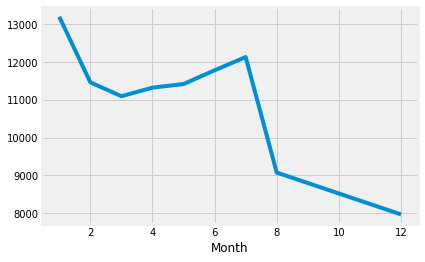

In [39]:
bymonth['e'].plot()

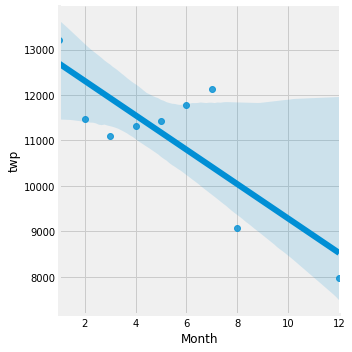

In [40]:
#we are seeing the data in lineplot, now do further analysis on why we missing the data
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

We are seeing a big drop from month 7 to 8 (which align with the lineplot) and also a wider error area in those months we missing data. Probably that's the reason we don't see them in barchart

In [22]:
#now we need to create a column as Date only as timeStamp has both date and time in it
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

#check data
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Problem,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,Thu,2015-12-10


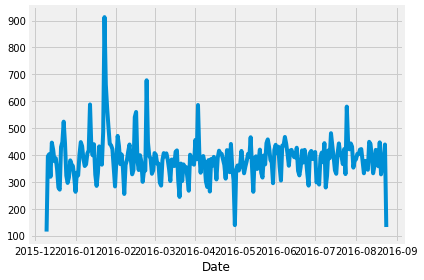

In [42]:
#check to see how the calls volumn changed across date
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Seeing spike at the begining of the year. Now checking each Reasons and see which one contribute to it and how their numbers of calls changed across the year

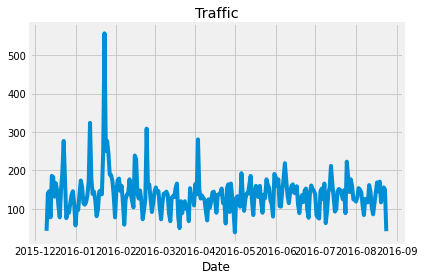

In [43]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

Finding: Traffic graph mirror the total graph, and we are seeing spike at the end and beginning of the year. This is probably because people are traveling more during holiday seasons, and hence have more accidents that require 911 calls

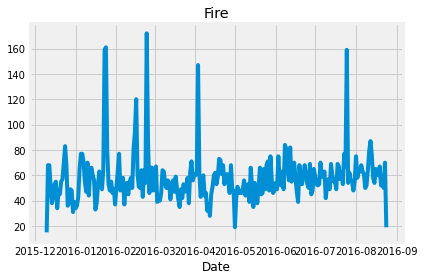

In [44]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

Finding: we are seeing 4 spikes across the year for Fire. The first 3 spikes are grouped around Q1 of the year (to be exact, both 2nd and 3rd spikes happened in Feb), the 4th spike is around April and the 5th is around Jul-Aug of the year, probably due to dry weather in Summer.

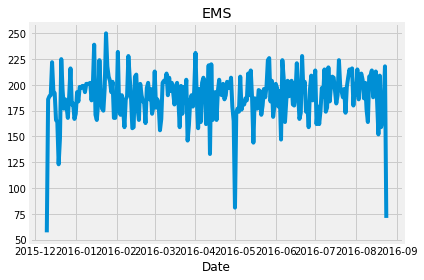

In [45]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Finding: EMS graph is slidely different than the other. We are seeing 3 major drops across the year: End of the year (Dec), mid of the year (May), and around Aug. 

In [23]:
#let's create a day of week & hour heatmap to futher display our data

#First, need to create matrix so heatmap could be used from seaborn
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354


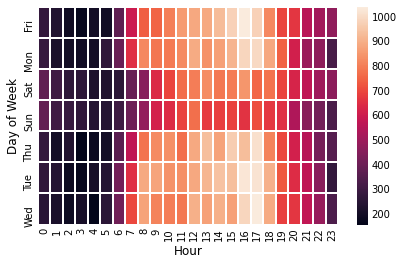

In [24]:
sns.heatmap(dayHour,linecolor='white',lw =1)

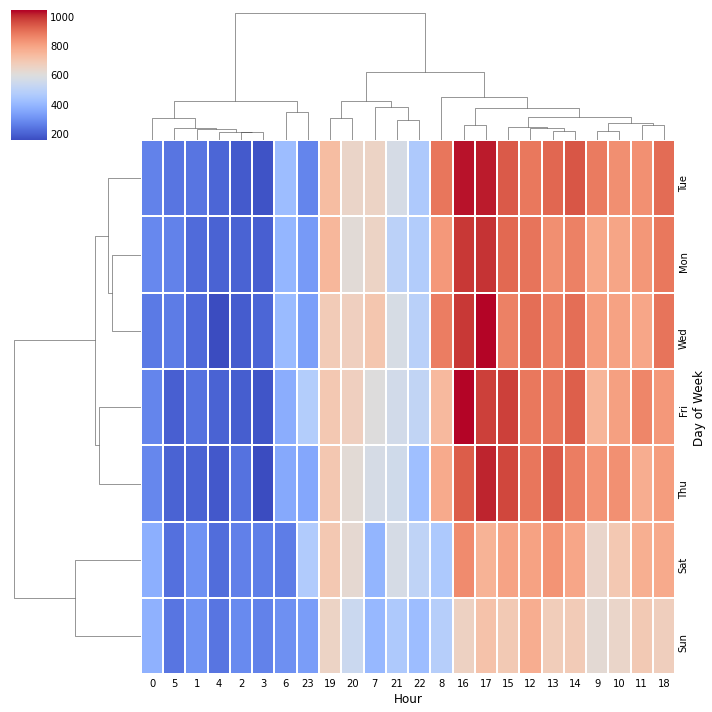

In [25]:
# Create clustermap to support our conclusion better
sns.clustermap(dayHour,linecolor='white',lw =1,cmap='coolwarm')

**Conclusion:**
1. The busiest hours across day of week are Hour 16 and Hour 17, on Weekdays
2. Every day (including weekend), Midnight hours (from Hour 23 till Hour 6) are the least busy time, probably due to most people are sleeping during those hours.
3. In general, Weekdays (Mon to Fri) are busier than weekends (Sat, Sun)

In [26]:
#let's create a day of week & month heatmap to futher display our data

#Same as before, we first need to create matrix so heatmap could be used from seaborn
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


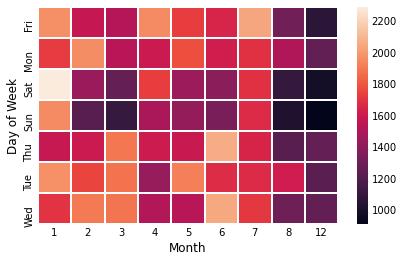

In [27]:
sns.heatmap(dayMonth,linecolor='white',lw =1)

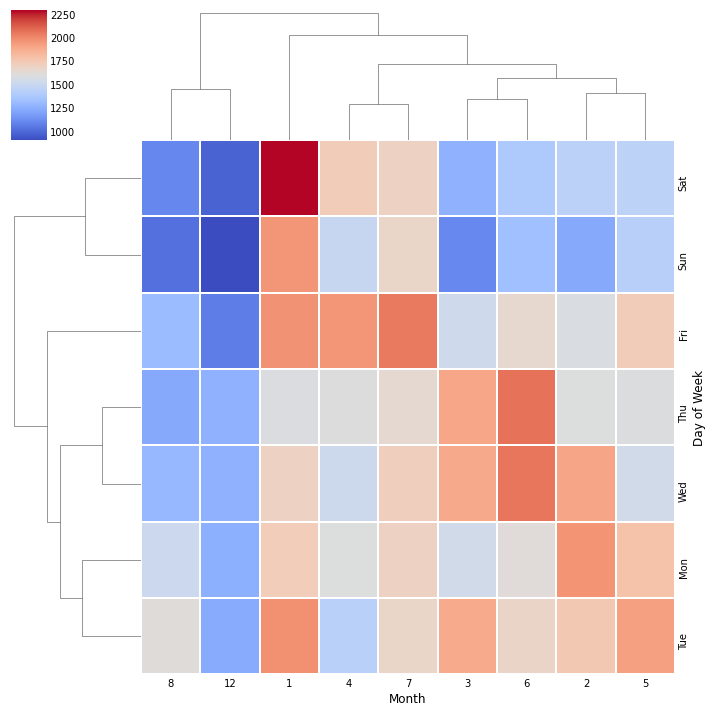

In [31]:
# Create clustermap to support our conclusion better
sns.clustermap(dayMonth,linecolor='white',lw =1, cmap ='coolwarm')

**Conclusion:**
1. In general Jan is the busiest month, and Saturday in Jan is the most busiest time across the year
2. Aug and Dec are two least busy months of the year. Among these months, weekend (Sunday & Saturday) is the least busy.
3. Weekends are least busy time every months except Jan and July (and Saturday in Apr)
4. Across the whole year, every months are busy on Weekdays (except Jan), and we see a drop starting in Aug till the end of the year.
*The report still missing from Sep to Nov, like we discovered in this report before